In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = ' https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest?'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '99a11805-9755-4696-9c3e-94d11f7fca78',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2024-10-30T19:09:28.657Z', 'error_code': 0, 'error_message': None, 'elapsed': 106, 'credit_count': 1, 'notice': None, 'total_count': 9904}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11793, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [3]:
type(data)

dict

In [4]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11793,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.977541e+07,1.977541e+07,False,NaN,1,NaN,NaN,None,2024-10-30T19:07:00.000Z,71862.092908,4.340307e+10,-23.9911,-0.067093,-1.994784,8.998024,13.267250,22.064331,13.888270,1.421102e+12,58.6282,1.509104e+12,None,2024-10-30T19:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-30 19:09:36.401114
1,1027,Ethereum,ETH,ethereum,9468,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204063e+08,1.204063e+08,True,NaN,2,NaN,NaN,None,2024-10-30T19:07:00.000Z,2663.318484,2.259865e+10,-1.6156,-0.420270,-0.038117,6.891302,2.865353,6.718599,-13.927789,3.206803e+11,13.2298,3.206803e+11,None,2024-10-30T19:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-30 19:09:36.401114
2,825,Tether USDt,USDT,tether,101999,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.205041e+11,1.223379e+11,True,NaN,3,NaN,NaN,None,2024-10-30T19:07:00.000Z,0.999797,7.271583e+10,-17.3160,0.011946,0.007946,0.098986,0.016202,-0.032335,0.084034,1.204796e+11,4.9729,1.223131e+11,None,2024-10-30T19:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-30 19:09:36.401114
3,1839,BNB,BNB,bnb,2273,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459309e+08,1.459309e+08,False,NaN,4,NaN,NaN,None,2024-10-30T19:07:00.000Z,598.633571,1.713049e+09,-9.5003,0.032475,-1.634077,3.574454,4.706313,12.458665,7.527359,8.735915e+10,3.6058,8.735915e+10,None,2024-10-30T19:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-30 19:09:36.401114
4,5426,Solana,SOL,solana,776,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.703778e+08,5.875364e+08,True,NaN,5,NaN,NaN,None,2024-10-30T19:07:00.000Z,173.926609,2.959675e+09,-27.7237,-0.854481,-3.871751,2.108477,12.132283,28.376850,8.257037,8.181121e+10,3.3752,1.021882e+11,None,2024-10-30T19:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-30 19:09:36.401114
5,3408,USDC,USDC,usd-coin,22753,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.490647e+10,3.490647e+10,False,NaN,6,NaN,NaN,None,2024-10-30T19:07:00.000Z,1.000021,7.961287e+09,-16.6774,0.011874,0.018677,0.006523,0.018765,0.004725,0.007530,3.490722e+10,1.4399,3.490722e+10,None,2024-10-30T19:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-30 19:09:36.401114
6,52,XRP,XRP,xrp,1413,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.681186e+10,9.998707e+10,False,NaN,7,NaN,NaN,None,2024-10-30T19:07:00.000Z,0.522980,9.563163e+08,-9.8523,-0.093949,-1.363835,1.120128,-16.017455,-7.739402,-9.472399,2.971146e+10,1.2256,5.229799e+10,None,2024-10-30T19:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-30 19:09:36.401114
7,74,Dogecoin,DOGE,dogecoin,1090,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.465859e+11,1.465859e+11,True,NaN,8,NaN,NaN,None,2024-10-30T19:07:00.000Z,0.168062,2.695940e+09,-33.7000,0.476652,-4.040700,23.660026,42.449888,65.319556,47.527065,2.463547e+10,1.0163,2.463547e+10,None,2024-10-30T19:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-30 19:09:36.401114
8,1958,TRON,TRX,tron,1059,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.646809e+10,8.6468

In [9]:
def api_runner():
    global df
    url = ' https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest?'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '99a11805-9755-4696-9c3e-94d11f7fca78',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df._append(df2)

    if not os.path.isfile(r'C:\Users\lamya\OneDrive\Python Output\API.csv'):
        df.to_csv(r'C:\Users\lamya\OneDrive\Python Output\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\lamya\OneDrive\Python Output\API.csv', mode = 'a', header = False)

In [ ]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

{'status': {'timestamp': '2024-10-30T19:09:40.344Z', 'error_code': 0, 'error_message': None, 'elapsed': 25, 'credit_count': 1, 'notice': None, 'total_count': 9904}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11793, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [ ]:
df72 = pd.read_csv(r'C:\Users\lamya\OneDrive\Python Output\API.csv')
df72

In [477]:
#suppress scientific notation 'circulating_supply' column
#df.set_option('display.float_format', lambda x: '%5f' % x), I tried this one but it didnt work
pd.options.display.float_format = '{:.5f}'.format

In [479]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11791,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19774471.00000,19774471.00000,False,NaN,1,NaN,NaN,None,2024-10-28T23:56:00.000Z,69895.34569,38784798461.28976,132.01930,0.13020,2.88460,3.70316,6.03120,17.74004,5.55097,1382143486372.06372,58.49670,1467802259479.58008,None,2024-10-28T23:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-28 23:59:05.247135
1,1027,Ethereum,ETH,ethereum,9462,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120403276.30720,120403276.30720,True,NaN,2,NaN,NaN,None,2024-10-28T23:56:00.000Z,2566.68728,18974368775.90755,93.47760,0.08099,2.42738,-3.73803,-4.21426,1.55966,-21.68837,309037558206.69556,13.07950,309037558206.70001,None,2024-10-28T23:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-28 23:59:05.247135
2,825,Tether USDt,USDT,tether,101744,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,120339320856.06236,121337925862.68210,True,NaN,3,NaN,NaN,None,2024-10-28T23:56:00.000Z,0.99953,66838094673.79149,94.11500,0.02910,0.07975,-0.00315,-0.05300,-0.06626,-0.01688,120282918653.04468,5.09080,121281055620.44000,None,2024-10-28T23:56:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-28 23:59:05.247135
3,1839,BNB,BNB,bnb,2271,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145931039.67862,145931039.67862,False,NaN,4,NaN,NaN,None,2024-10-28T23:56:00.000Z,600.38979,1669274679.56941,19.05910,-0.13324,1.98633,0.21331,-0.21897,11.85689,2.25745,87615506405.79955,3.70770,87615506405.80000,None,2024-10-28T23:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-28 23:59:05.247135
4,5426,Solana,SOL,solana,774,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,470276532.65927,587395146.96447,True,NaN,5,NaN,NaN,None,2024-10-28T23:56:00.000Z,178.01571,3621750089.91398,49.21260,-0.34461,0.80630,6.97852,13.45345,27.19774,-0.59734,83716611740.20113,3.54270,104565565239.74001,None,2024-10-28T23:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-28 23:59:05.247135
5,3408,USDC,USDC,usd-coin,22702,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34724297403.82978,34724297403.82978,False,NaN,6,NaN,NaN,None,2024-10-28T23:56:00.000Z,1.00010,7849432606.42421,128.37580,0.03030,0.02439,0.02029,0.02371,0.00948,0.01880,34727841773.45461,1.46960,34727841773.45000,None,2024-10-28T23:56:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-28 23:59:05.247135
6,52,XRP,XRP,xrp,1411,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56811862950.00000,99987068281.00000,False,NaN,7,NaN,NaN,None,2024-10-28T23:56:00.000Z,0.51909,837862638.79020,64.33880,0.00058,0.51567,-4.72788,-15.54590,-7.60305,-17.27086,29490413722.79247,1.24800,51908901048.97000,None,2024-10-28T23:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-28 23:59:05.247135
7,74,Dogecoin,DOGE,dogecoin,1088,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146561136383.70526,146561136383.70526,True,NaN,8,NaN,NaN,None,2024-10-28T23:55:00.000Z,0.16102,3072705646.71331,172.51550,1.91395,11.66267,12.00641,25.07884,60.35086,28.20793,23599037541.10212,0.99900,23599037541.10000,None,2024-10-28T23:55:00.000Z,NaN,NaN,Na

In [481]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.08944,2.89614,3.74092,6.06924,17.73182,5.57866
Ethereum,0.03883,2.40565,-3.75178,-4.19516,1.50446,-21.72413
Tether USDt,0.01134,0.06469,-0.01950,-0.07941,-0.07469,-0.03579
BNB,-0.12725,2.00978,0.26367,-0.17626,11.89633,2.23459
Solana,-0.27623,0.84937,7.07654,13.48368,27.17770,-0.57715
USDC,0.01581,0.00680,0.00669,0.00180,0.00173,0.00254
XRP,0.00866,0.53715,-4.71492,-15.54585,-7.61266,-17.28947
Dogecoin,1.94773,11.67199,12.09749,25.19813,60.43144,28.27568
TRON,-0.05555,0.08107,3.60005,5.74719,2.51372,23.34530


In [483]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.08944
              quote.USD.percent_change_24h     2.89614
              quote.USD.percent_change_7d      3.74092
              quote.USD.percent_change_30d     6.06924
              quote.USD.percent_change_60d    17.73182
              quote.USD.percent_change_90d     5.57866
Ethereum      quote.USD.percent_change_1h      0.03883
              quote.USD.percent_change_24h     2.40565
              quote.USD.percent_change_7d     -3.75178
              quote.USD.percent_change_30d    -4.19516
              quote.USD.percent_change_60d     1.50446
              quote.USD.percent_change_90d   -21.72413
Tether USDt   quote.USD.percent_change_1h      0.01134
              quote.USD.percent_change_24h     0.06469
              quote.USD.percent_change_7d     -0.01950
              quote.USD.percent_change_30d    -0.07941
              quote.USD.percent_change_60d    -0.07469
              quote.US

In [485]:
type(df4)

pandas.core.series.Series

In [487]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.08944
             quote.USD.percent_change_24h   2.89614
             quote.USD.percent_change_7d    3.74092
             quote.USD.percent_change_30d   6.06924
             quote.USD.percent_change_60d  17.73182
             quote.USD.percent_change_90d   5.57866
Ethereum     quote.USD.percent_change_1h    0.03883
             quote.USD.percent_change_24h   2.40565
             quote.USD.percent_change_7d   -3.75178
             quote.USD.percent_change_30d  -4.19516
             quote.USD.percent_change_60d   1.50446
             quote.USD.percent_change_90d -21.72413
Tether USDt  quote.USD.percent_change_1h    0.01134
             quote.USD.percent_change_24h   0.06469
             quote.USD.percent_change_7d   -0.01950
             quote.USD.percent_change_30d  -0.07941
             quote.USD.percent_change_60d  -0.07469
             quote.USD.percent_change_90d  -0.03579
BNB          quote.USD.percent_change_1h   -0.12725
             quote.USD.percent_change_24h   2.00978
             quote.USD.percent_change_7d    0.26367
             quote.USD.percent_change_30d  -0.17626
             quote.USD.percent_change_60d  11.89633
             quote.USD.percent_change_90d   2.23459
Solana       quote.USD.percent_change_1h   -0.27623
             quote.USD.percent_change_24h   0.84937
             quote.USD.percent_change_7d    7.07654
             quote.USD.percent_change_30d  13.48368
             quote.USD.percent_change_60d  27.17770
             quote.USD.percent_change_90d  -0.57715
USDC         quote.USD.percent_change_1h    0.01581
             quote.USD.percent_change_24h   0.00680
             quote.USD.percent_change_7d    0.00669
             quote.USD.percent_change_30d   0.00180
             quote.USD.percent_change_60d   0.00173
             quote.USD.percent_change_90d   0.00254
XRP          quote.USD.percent_change_1h    0.00866
             quote.USD.percent_change_24h   0.53715
             quote.USD.percent_change_7d   -4.71492
             quote.USD.percent_change_30d -15.54585
             quote.USD.percent_change_60d  -7.61266
             quote.USD.percent_change_90d -17.28947
Dogecoin     quote.USD.percent_change_1h    1.94773
             quote.USD.percent_change_24h  11.67199
             quote.USD.percent_change_7d   12.09749
             quote.USD.percent_change_30d  25.19813
             quote.USD.percent_change_60d  60.43144
             quote.USD.percent_change_90d  28.27568
TRON         quote.USD.percent_change_1h   -0.05555
             quote.USD.percent_change_24h   0.08107
             quote.USD.percent_change_7d    3.60005
             quote.USD.percent_change_30d   5.74719
             quote.USD.percent_change_60d   2.51372
             quote.USD.percent_change_90d  23.34530
Toncoin      quote.USD.percent_change_1h   -0.04910
             quote.USD.percent_change_24h   0.74576
             quote.USD.percent_change_7d   -3.53590
             quote.USD.percent_change_30d -14.92573
             quote.USD.percent_change_60d  -8.06040
             quote.USD.percent_change_90d -25.55132
Cardano      quote.USD.percent_change_1h   -0.25832
             quote.USD.percent_change_24h   1.14931
             quote.USD.percent_change_7d   -4.78174
             quote.USD.percent_change_30d -14.27573
             quote.USD.percent_change_60d  -3.64617
             quote.USD.percent_change_90d -14.41250
Shiba Inu    quote.USD.percent_change_1h    0.78529
             quote.USD.percent_change_24h   5.80105
             quote.USD.percent_change_7d   -0.93559
             quote.USD.percent_change_30d  -7.43621
             quote.USD.percent_change_60d  29.40350
             quote.USD.percent_change_90d  10.99063
Avalanche    quote.USD.percent_change_1h   -0.10489
             quote.USD.percent_change_24h   2.04569
             quote.USD.percent_change_7d   -5.43040
             quote.USD.percent_change_30d

In [489]:
df5.count()

values    90
dtype: int64

In [491]:
index = pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.08944
1,Bitcoin,quote.USD.percent_change_24h,2.89614
2,Bitcoin,quote.USD.percent_change_7d,3.74092
3,Bitcoin,quote.USD.percent_change_30d,6.06924
4,Bitcoin,quote.USD.percent_change_60d,17.73182
5,Bitcoin,quote.USD.percent_change_90d,5.57866
6,Ethereum,quote.USD.percent_change_1h,0.03883
7,Ethereum,quote.USD.percent_change_24h,2.40565
8,Ethereum,quote.USD.percent_change_7d,-3.75178
9,Ethereum,quote.USD.percent_change_30d,-4.19516


In [493]:
df7 = df6.rename(columns = {'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.08944
1,Bitcoin,quote.USD.percent_change_24h,2.89614
2,Bitcoin,quote.USD.percent_change_7d,3.74092
3,Bitcoin,quote.USD.percent_change_30d,6.06924
4,Bitcoin,quote.USD.percent_change_60d,17.73182
5,Bitcoin,quote.USD.percent_change_90d,5.57866
6,Ethereum,quote.USD.percent_change_1h,0.03883
7,Ethereum,quote.USD.percent_change_24h,2.40565
8,Ethereum,quote.USD.percent_change_7d,-3.75178
9,Ethereum,quote.USD.percent_change_30d,-4.19516


In [495]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])

In [497]:
df7

,name,percent_change,values
0,Bitcoin,1h,0.08944
1,Bitcoin,24h,2.89614
2,Bitcoin,7d,3.74092
3,Bitcoin,30d,6.06924
4,Bitcoin,60d,17.73182
5,Bitcoin,90d,5.57866
6,Ethereum,1h,0.03883
7,Ethereum,24h,2.40565
8,Ethereum,7d,-3.75178
9,Ethereum,30d,-4.19516


In [499]:
import seaborn as sns 
import matplotlib.pyplot as plt

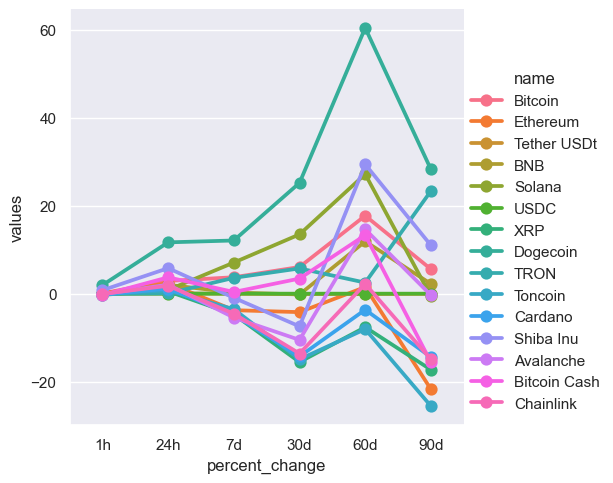

In [501]:
sns.catplot(x='percent_change', y='values', hue = 'name', data=df7, kind= 'point')

In [502]:
df8 = df[['name', 'quote.USD.price', 'timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,69895.34569,2024-10-28 23:59:05.247135
0,Bitcoin,69895.34569,2024-10-28 23:59:21.898131
0,Bitcoin,69902.26768,2024-10-29 00:00:22.431302
0,Bitcoin,69906.20020,2024-10-29 00:01:22.946476
0,Bitcoin,69911.73957,2024-10-29 00:02:23.432680


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

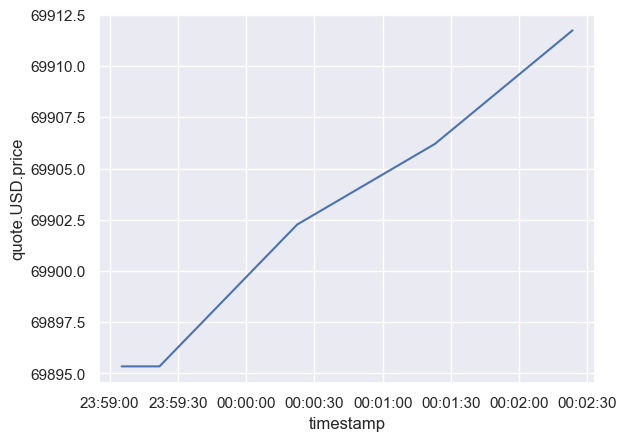

In [505]:
sns.set_theme(style= 'darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data = df8)